## More plotting

- Descriptive statistics
- Other statistical plots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mp

## Loading simple text data

Consider a simple text file like `data/data.txt` which is located the
`data` directory on the interface. The file has two columns of data like so:
```
6.930830303506971291e+01 1.950570203348928500e+00
5.076032587226054460e+01 1.968615715715650527e+00
6.285323760945500027e+01 1.343008070563283418e+00
7.068897251770047774e+01 1.602208201785916941e+00
...
```
This can be easily loaded as a numpy array like so:

In [2]:
# Change the path to suit your setup.
data = np.loadtxt('../data/data.txt')

In [3]:
print(len(data))
data[:2]

100


array([[69.30830304,  1.9505702 ],
       [50.76032587,  1.96861572]])

- Look at the documentation for `np.loadtxt`
- Since this has two columns, we can use `unpack=True` to extract the two columns

In [4]:
x, y = np.loadtxt('../data/data.txt', unpack=True)
print(len(x), len(y))
x[:2]

100 100


array([69.30830304, 50.76032587])

## Mean, std-dev, percentiles, ...

Now let us look at some simple statistics of this data.

In [5]:
np.mean(x)

np.float64(64.37622951831253)

In [6]:
np.mean(y)

np.float64(1.7163359811861927)

In [7]:
# This is the biased estimator.
np.std(x)

np.float64(10.172725902379932)


The biased estimator is:
$$\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n}$$
The unbiased estimator is:
$$\sigma^2 = \frac{\sum_{i=1}^n (X_i - \bar{X})^2}{n-1}$$

In [8]:
# The unbiased estimator
np.std(x, ddof=1)

np.float64(10.223974216158723)

In [9]:
np.median(x)

np.float64(65.53904444961248)

### Percentiles

In [10]:
np.percentile(x, 50)

np.float64(65.53904444961248)

In [11]:
# Get multiple in one shot.
np.percentile(x, [25, 50, 75, 90])

array([57.42318383, 65.53904445, 71.19354312, 76.7905247 ])

## Exercise

- For the data above
- Find the percentiles from 0 to 100 (in unit steps)
- Plot them


range(0, 101)


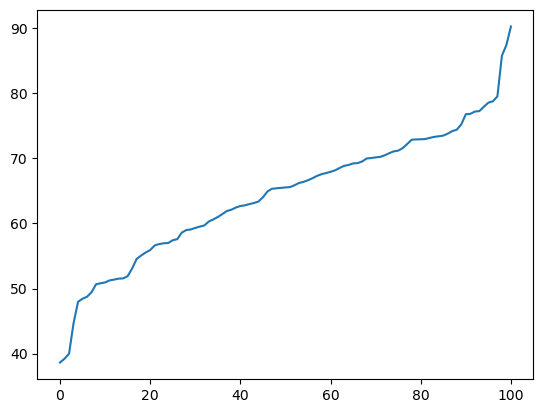

In [12]:
# Solution
perc = range(101)
print(perc)
plt.plot(perc, np.percentile(x,perc));

## Scatter plots

Useful to get a sense of the data and their relationship

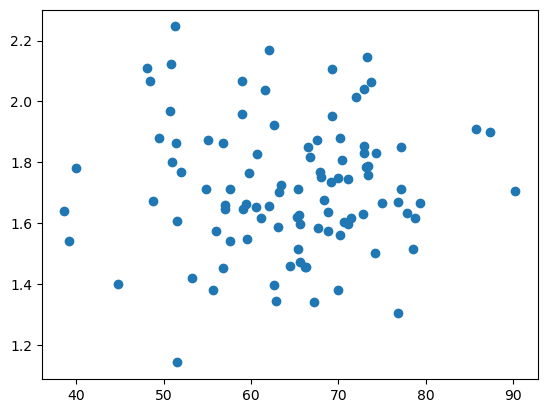

In [13]:
plt.scatter(x, y);

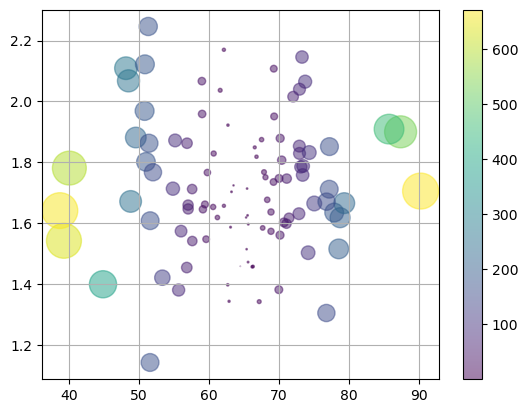

In [14]:
# Can also show size and color.
# We construct a simple scalar to display.
s = (x-np.mean(x))**2 + (y - np.mean(y))**2
plt.scatter(x, y, c=s, s=s, alpha=0.5)
plt.colorbar()
plt.grid();

## Histograms

Very useful to get a sense of the distribution of the data.

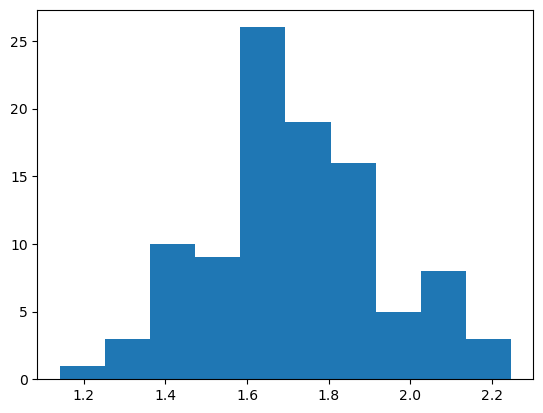

In [15]:
plt.hist(y);

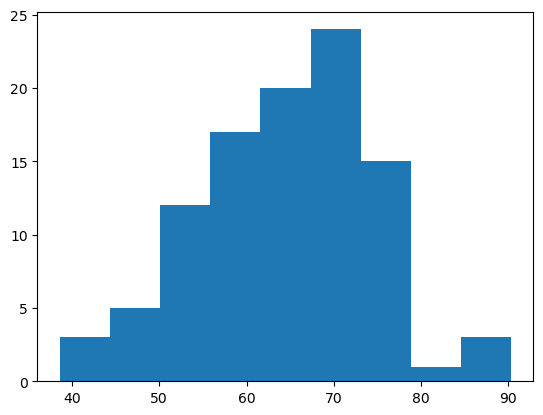

In [16]:
# Warning default bins are just 10, using 'auto' is always a better idea.
plt.hist(x, bins='auto');

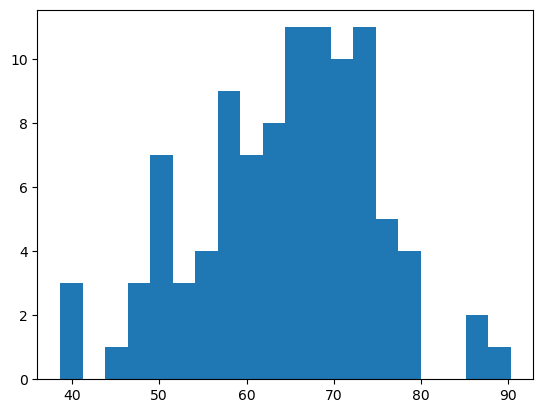

In [17]:
# But if you know better you can specify the number of bins.
plt.hist(x, bins=20);

Note the output of this is the counts, bins_edges, patches

counts [13. 12. 13. 12. 12. 13. 12. 13.]
bins [-3.08921297 -2.30766919 -1.5261254  -0.74458161  0.03696218  0.81850597
  1.60004976  2.38159355  3.16313733]
patches <BarContainer object of 8 artists>


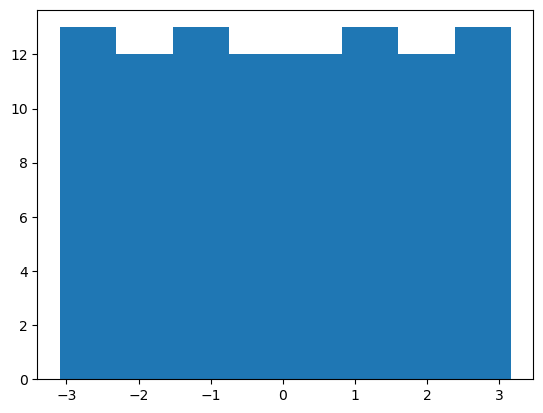

In [17]:
counts, bins, patches = plt.hist(x, bins='auto');
print("counts", counts)
print("bins", bins)
print("patches", patches)

In [18]:
# Numpy is used to generate the counts, bins
c, b = np.histogram(x, bins='auto')

In [20]:
np.allclose(c, counts) and np.allclose(b, bins)

True

In [21]:
c[:5], b[:5]

(array([ 3,  5, 12, 17, 20]),
 array([38.62946704, 44.36826437, 50.10706171, 55.84585904, 61.58465637]))

### Cumulative and relative histograms

- Hope you've seen this in your Statistics course?
- You get an empirical probability density function (PDF) through a
  histogram!
- But this has to be a relative histogram, i.e. use `density=True`
- A cumulative histogram is an approximation to a Cumulative Distribution
  Function (CDF)

This is very important and valuable as we will see later.

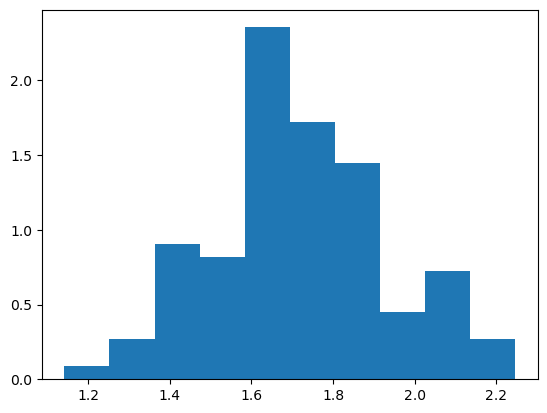

In [22]:
# Relative histogram.
plt.hist(y, bins='auto', density=True);


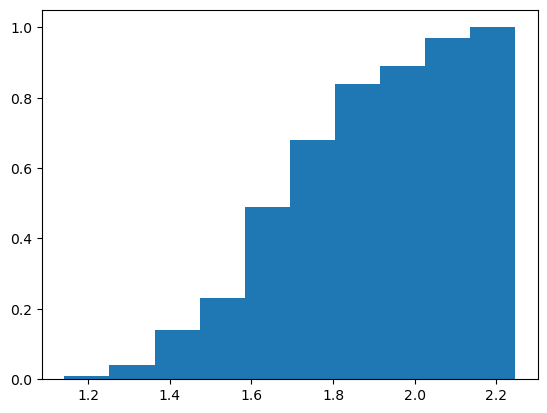

In [23]:
plt.hist(y, bins='auto', cumulative=True, density=True);

## Box-plots

- Powerful plotting utility
- Shows the distribution of the data at a glance
- Typically shows the following:
   - Median, Q1, Q3, IQR
   - Q1 - 1.5 x IQR, Q3 + 1.5 x IQR


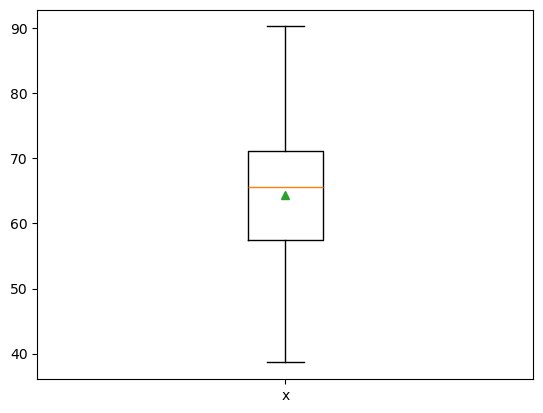

In [24]:
plt.boxplot(x, tick_labels=['x'], showmeans=True);

- Can show multiple boxplots together


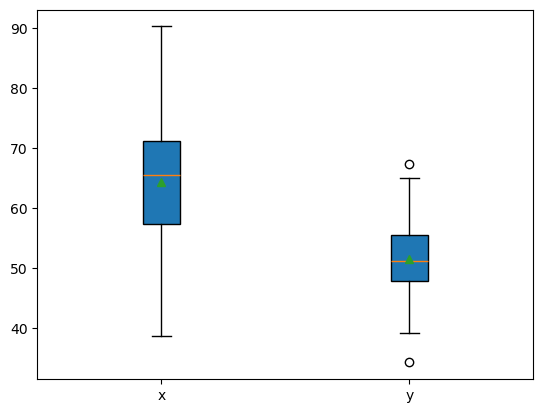

In [25]:
plt.boxplot((x, y*30), tick_labels=['x', 'y'], showmeans=True, patch_artist=True);

## Violin plots!

- Combine PDFs and box plots.


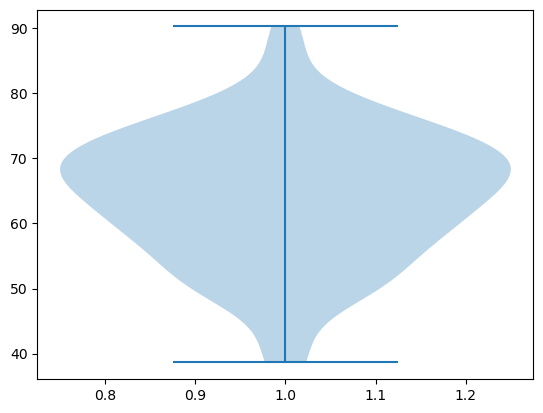

In [26]:
plt.violinplot(x);

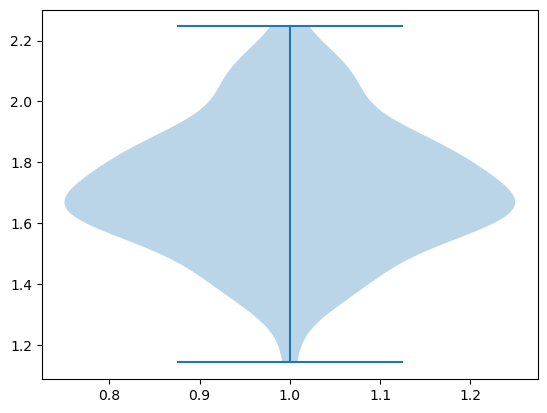

In [27]:
plt.violinplot(y);

## Pearson's correlation coefficient

 $$\begin{aligned}
 r = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y})}{(n-1) s_x s_y} \\
 \end{aligned}$$$$r = \frac{\sum_i (x_i - \bar{x}) (y_i - \bar{y}) }
          {\sqrt {\sum (x_i - \bar{x})^2 \sum (y_i - \bar{y})^2}}$$

- $-1 \leq r \leq 1$
- \"Small\" r implies lower correlation

In [28]:
np.corrcoef(x, y)

array([[1.        , 0.00618002],
       [0.00618002, 1.        ]])

## Pie and bar charts.

- In general avoid pie charts, use barcharts/histograms instead.
- But here is how you can do this.

Consider this data:

| **Cancer**  | Lung | Breast | Colon | Prostate | Melanoma | Bladder |
|-------------|------|--------|-------|----------|----------|---------|
| **Numbers** | 42   |  50    |  32   |   55     |  9       |  12     |


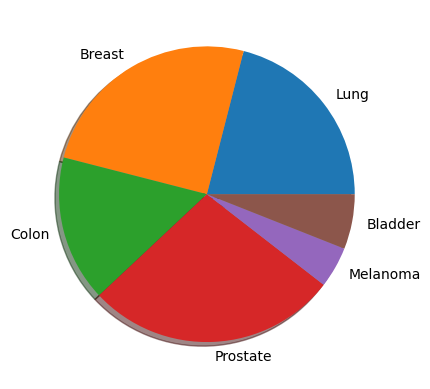

In [29]:
# Solution
cancer = ['Lung', 'Breast', 'Colon', 'Prostate', 'Melanoma', 'Bladder']
numbers = [42, 50, 32, 55, 9, 12]
plt.pie(numbers, labels=cancer, shadow=True);

### Better to use a bar chart


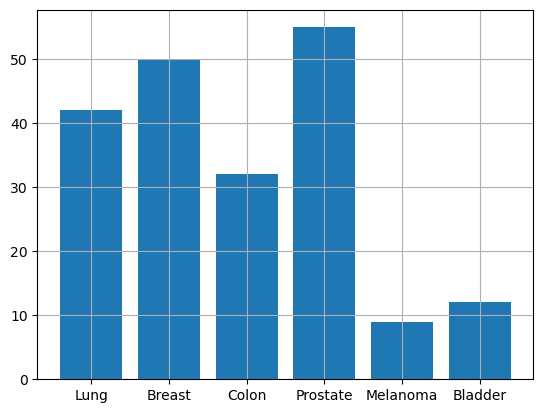

In [30]:
x = np.arange(len(numbers))
plt.bar(x, numbers, tick_label=cancer)
plt.grid();

## Exercise

- Load the data in `'sachin.txt'`, and `'kohli.txt'`
- These have the ODI runs for Sachin Tendulkar and Virat Kohli
- They have a single column each
- Load the data using `np.loadtxt`
- Show a histogram (relative) for each.
- Show them together, use the same approach as we did for boxplot.
- Hint: use `plt.legend` to set the legend
- Show the data using a boxplot
- Show the data using a violin plot.

Comment on the player's performance

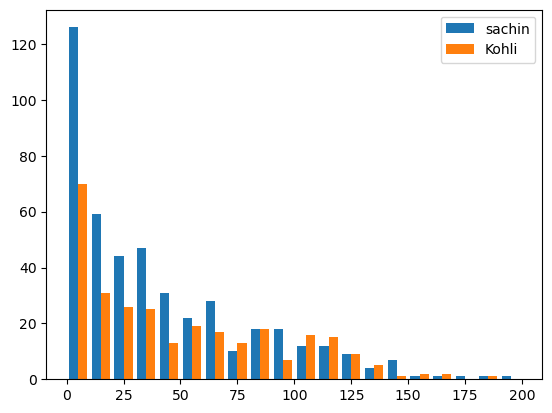

In [25]:
# Solution
sachin = np.loadtxt("..\data\sachin.txt")
kohli = np.loadtxt("..\data\kohli.txt")
plt.hist([sachin, kohli], bins=20, label=["sachin", "Kohli"])
plt.legend(loc="upper right")

(array([100.,  45.,  30.,  29.,  30.,  21.,  23.,   7.,   3.,   2.]),
 array([  0. ,  18.3,  36.6,  54.9,  73.2,  91.5, 109.8, 128.1, 146.4,
        164.7, 183. ]),
 <BarContainer object of 10 artists>)

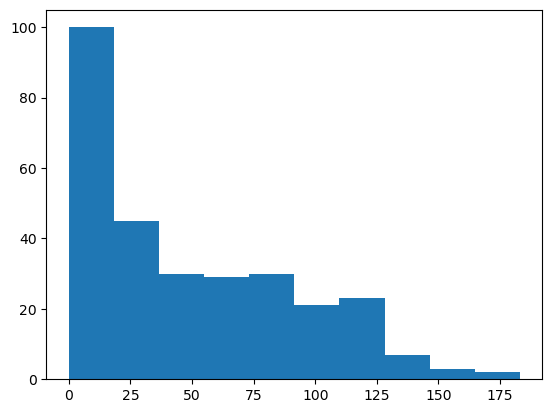

In [32]:
plt.hist(kohli, bins="auto")

(array([70., 30., 23., 22., 15., 15., 15., 14., 17., 13.,  8., 13., 15.,
         8.,  4.,  3.,  1.,  2.,  1.,  1.]),
 array([  0.  ,   9.15,  18.3 ,  27.45,  36.6 ,  45.75,  54.9 ,  64.05,
         73.2 ,  82.35,  91.5 , 100.65, 109.8 , 118.95, 128.1 , 137.25,
        146.4 , 155.55, 164.7 , 173.85, 183.  ]),
 <BarContainer object of 20 artists>)

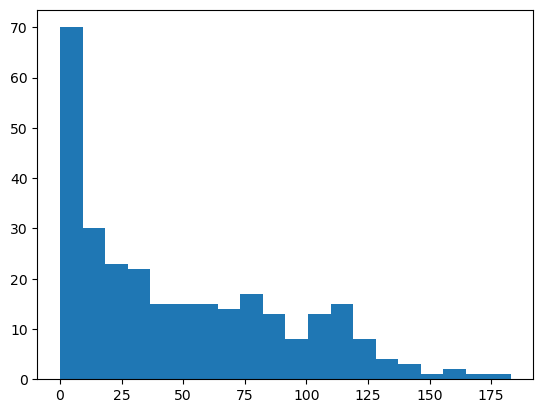

In [33]:
plt.hist(kohli, bins=20)

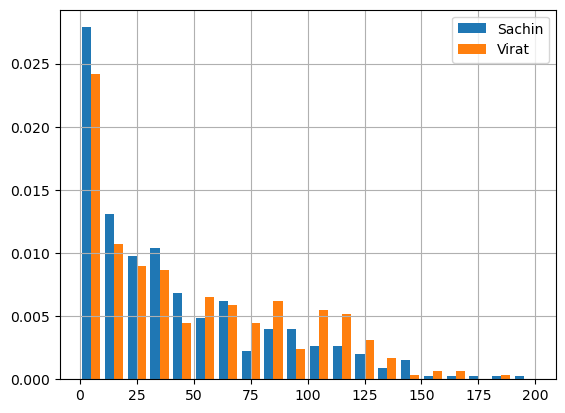

In [34]:
plt.hist( (sachin,kohli), density=True, bins=20)
plt.legend(['Sachin', 'Virat'])
plt.grid()

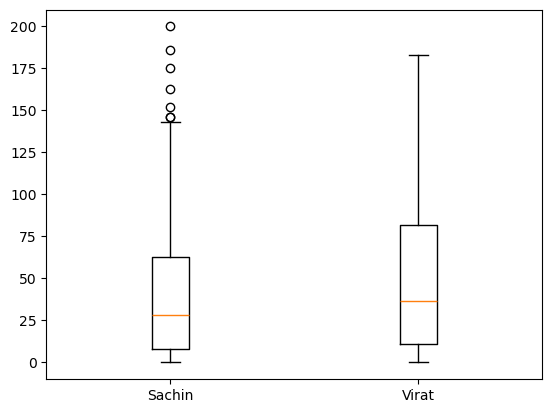

In [35]:
plt.boxplot((sachin, kohli), tick_labels=['Sachin', 'Virat']);

## Connection to probability theory

- We've seen various kinds of plots
- So far this is entirely visual
- We can actually do very powerful things with this

Let us first look at how histograms work.

- Counts number of occurrences in each bin.
- Bins are chosen automatically via `'auto'` or explicitly specified

### Probability mass function (PMF)

- Used for discrete distributions, Bernoulli, Binomial, Poisson etc.
- Assigns probability for each value $p(x)$
- Empirically, this is basically the relative count of occurrence of the
  value! Note that this is exactly how a relative histogram is found.

### Probability density function (PDF)

- Used for discrete distributions, uniform, normal, Chi-square, T etc.
- Probability density function: $f(x)$
- Probability in some region of $x$, $\Delta x$ is: $f(x) \Delta x$

In this case, for N data points, the values of the histogram are = ``count/(N*bin_width)``
This produces the density function.

Consider Sachin's scores

In [36]:
ds = np.loadtxt('../data/sachin.txt')
print(len(ds), max(ds))

452 200.0


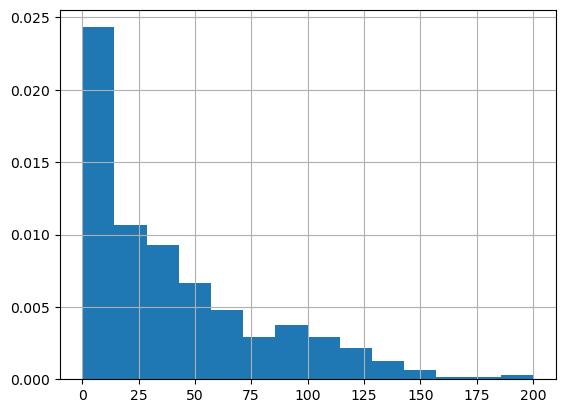

In [37]:
# A simple histogram is not enough
plt.hist(ds, bins='auto', density=True);
plt.grid()
# plt.yscale(value= ___, mp.scale.LinearScale)

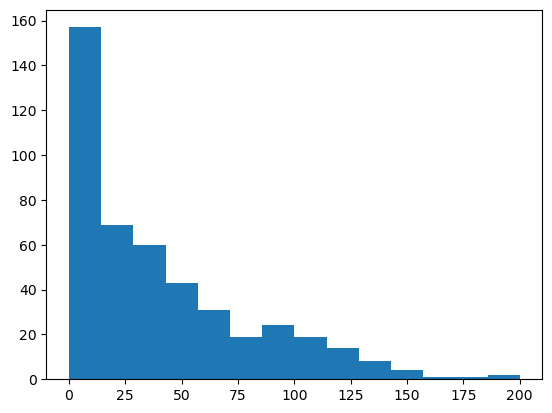

In [38]:
# A simple histogram is not enough
plt.hist(ds, bins='auto');

- The problem with this is that this is not really a probability mass
  function.
- It is a PDF.

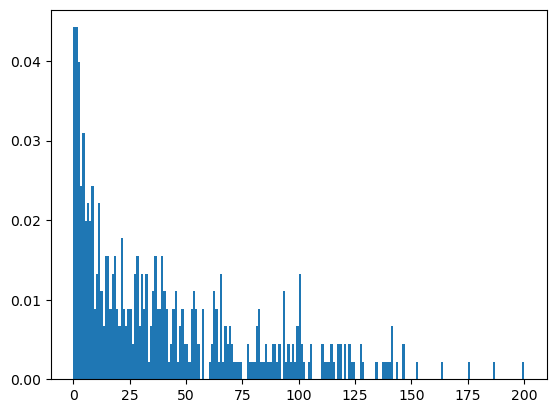

In [39]:
# This will produce a rough PMF
plt.hist(ds, bins=range(201), density=True);


This is not perfect since we have only about 450 points in total (which is
quite a bit).

If all we want is the counts without a plot, we can simply use `np.histogram`

In [40]:
pmf, bins = np.histogram(ds, bins=range(201), density=True)
print(pmf, bins)

[0.04424779 0.04424779 0.03982301 0.02433628 0.03097345 0.0199115
 0.02212389 0.0199115  0.02433628 0.00884956 0.01327434 0.02212389
 0.01106195 0.00663717 0.01548673 0.01548673 0.00884956 0.01327434
 0.01548673 0.00884956 0.00663717 0.01769912 0.00884956 0.00663717
 0.00884956 0.00884956 0.00442478 0.01327434 0.01548673 0.00663717
 0.01327434 0.00884956 0.01327434 0.00221239 0.00663717 0.01106195
 0.01548673 0.00884956 0.00884956 0.01548673 0.01106195 0.00884956
 0.00221239 0.00442478 0.00884956 0.01106195 0.00221239 0.00663717
 0.00884956 0.00442478 0.00442478 0.00221239 0.00884956 0.01106195
 0.00884956 0.00442478 0.         0.00884956 0.         0.
 0.00221239 0.00442478 0.01106195 0.00884956 0.00221239 0.01327434
 0.00221239 0.00663717 0.00442478 0.00663717 0.00442478 0.00221239
 0.00221239 0.00221239 0.00221239 0.         0.         0.00442478
 0.00221239 0.00221239 0.00221239 0.00663717 0.00884956 0.00221239
 0.00221239 0.00442478 0.00221239 0.00221239 0.00442478 0.00442478
 0.0

### Why is this useful

If you know the PMF/PDF you basically know a great deal about the data.
You can use it to ask all sort sof probability based questions.

- What is the median score, what is the IQR, etc.?
- What is the probability that Sachin will score < 10?
- What is the probability that he will score > 50?
- What is the probability that he will score > 100 given that he crossed 50?

These are quite deep questions that can be easily answered with the data.
You can do this to even compare players.

## Exercise

Try to answer some of these quickly.

1. What is the probability that Sachin will score < 10?
2. What is the probability that Sachin will score > 50?
3. What is the probability that he will cross 100 given that he crossed 50?

We can do this either with a PMF or a PDF.

In [41]:
pmf_arr, bis = np.histogram(ds, bins = range(201), density=True)
print(f"probability of scoring less than 10, sum of first 10 {sum(pmf_arr[0:11])}")
print(f"probability that Sachin will score > 50, sum of elements from 51 to end of array {sum(pmf_arr[51:])}")
print(f" probability that he will cross 100 given that he crossed 50, probability of >100 / probability of >50 = {sum(pmf_arr[100:])/sum(pmf_arr[51:])}")

probability of scoring less than 10, sum of first 10 0.29203539823008856
probability that Sachin will score > 50, sum of elements from 51 to end of array 0.3163716814159294
 probability that he will cross 100 given that he crossed 50, probability of >100 / probability of >50 = 0.34265734265734255


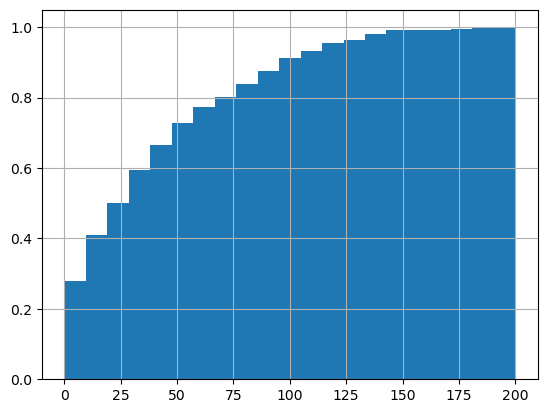

In [42]:
# A simple histogram is not enough
c, b, p = plt.hist(ds, bins=21, density=True, cumulative=True);
plt.grid()
# What is the probability that Sachin will score < 10? - 0.029 * 10 = 0.29

In [43]:
c[1] # What is the probability that Sachin will score < 10? - 0.029

np.float64(0.4092920353982301)

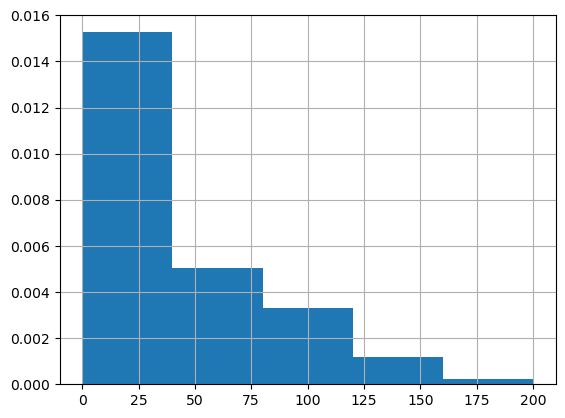

In [44]:
# A simple histogram is not enough
plt.hist(ds, bins=5, density=True);
plt.grid()
# What is the probability that Sachin will score < 10? - 0.029

In [45]:
# Note on how the CDF is made.
c, b = np.histogram(ds, bins=range(201), density=True)
counts = np.cumsum(c)


## Exercise

1. Write a simple function that returns the PMF for a batsman's data given
   their scores.
2. Also generate the cumulative distribution function.
3. Write a function to compute probabilities in a range (a, b) given the
   PMF/CDF.


As you can see, the PDF/PMF is incredibly useful when answering practical
questions.

We will upload an exercise for you to do based on these.



## Interactivity with widgets

- Jupyter widgets or [IPyWidgets](https://ipywidgets.readthedocs.io/) make
  it very easy to add interactivity to a notebook.
- Already installed on the course website.
- Usually already installed in Anaconda.

Here we learn the bare-minimum to get started. Read the docs to learn more.


In [46]:
from ipywidgets import interact

In [47]:
def sine_plot(k=1, phi=0.0):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x*k + phi)
    plt.plot(x, y)
    plt.grid()

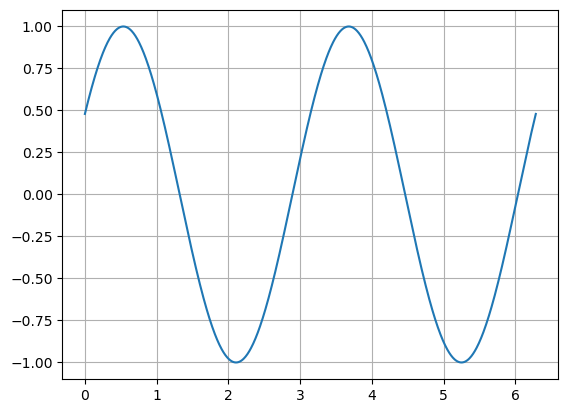

In [48]:
sine_plot(k=2, phi=0.5)

In [49]:
interact(sine_plot, k=(1, 20), phi=(0, 2*np.pi))

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), FloatSlider(value=0.0, description='…

<function __main__.sine_plot(k=1, phi=0.0)>

Can also use the decorator syntax

In [50]:
@interact(k=(1, 20), phi=(0, 2*np.pi))
def sine_plot(k=1, phi=0.0):
    x = np.linspace(0, 2*np.pi, 1000)
    y = np.sin(x*k + phi)
    plt.plot(x, y)
    plt.grid()

interactive(children=(IntSlider(value=1, description='k', max=20, min=1), FloatSlider(value=0.0, description='…

### Another example


In [51]:
@interact(name=['Krishna', 'Prabhu', 'Hassan'], n=(0, 10), x=(0.0, 1.0))
def f(option=True, hi='Hello', name='Krishna', n=1, x=0.1):
    print(option, hi, name, n, x)

interactive(children=(Checkbox(value=True, description='option'), Text(value='Hello', description='hi'), Dropd…

### Aside: decorators

- Decorators are higher order functions
- Operate on a function and return a function


In [52]:
# Trivial example
def deco(f):
    return f

In [53]:
@deco
def g(x):
    pass

# Equivalent to
h = deco(g)

In [54]:
g(1)

In [55]:
# More complex example
def deco1(f):
    def _my_f(x):
        print("Hello!")
        return f(x)
    return _my_f

In [56]:
@deco1
def g(x):
    return x + 1

In [57]:
g(1)

Hello!


2

In [58]:
ds = np.loadtxt('../data/dhoni.txt')
print(len(ds), max(ds))

144 224.0


## Summary

- Statistical quantities: mean, median, std. dev., percentiles
- Statistical plots: scatter plot, histogram, boxplot, bar/pie chart, violin
  plot
- Correlation coefficient
- Practical applications and answering some very interesting questions
- Interactivity with `ipywidets` and `interact`
- Decorators

# Ashish Extra study from chatgpt / gemini for PDF and other stuff

An empirical probability density function (PDF) can be obtained from a histogram by normalizing the bin counts so that the total area of the bars equals 1. This is done by setting the density parameter to True when creating a histogram with matplotlib.pyplot.hist().

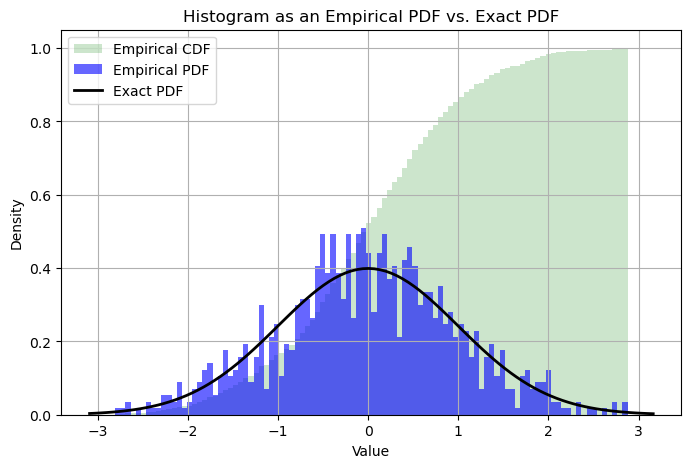

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Generate 1000 random numbers from a standard normal distribution (mean=0, std=1)
data = np.random.randn(1000)
# print(data[:10], min(data), max(data))

# Create a histogram with density=True
plt.figure(figsize=(8, 5))
plt.hist(data, bins=100, density=True, cumulative=True, alpha=0.2, color='g', label='Empirical CDF')
n, bins, patches = plt.hist(data, bins=100, density=True, alpha=0.6, color='b', label='Empirical PDF')

# Plot the theoretical PDF for comparison
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, 0, 1)
# print(f' scipy norm pdf {p}')
plt.plot(x, p, 'k', linewidth=2, label='Exact PDF')

title = "Histogram as an Empirical PDF vs. Exact PDF"
plt.title(title)
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()
plt.grid(True)


plt.show()

In [8]:
print(np.linspace(0, 5, 11))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]
